<a href="https://colab.research.google.com/github/fisicadeparticulas/20211026_analsisdeopendatacms-AlejRamos/blob/main/Copia_de_Copia_de_MasaSample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

archivo = pd.read_csv("https://goo.gl/sp8gYx")
archivo.head()

,Run,Event,type1,Q1,pt1,eta1,phi1,E1,px1,py1,pz1,type2,Q2,pt2,eta2,phi2,E2,px2,py2,pz2,M
0,166699,835716681,G,1,4.2116,2.2366,-0.4849,19.9382,3.7261,-1.9631,19.4881,T,-1,1.2556,2.2683,-1.4488,6.1319,0.1528,-1.2463,6.0011,2.1330
1,166699,836133459,G,-1,2.1479,-2.0159,-2.7753,8.2066,-2.0055,-0.7692,-7.9199,G,1,19.5453,-1.0826,-0.3408,32.1613,18.4210,-6.5332,-25.5406,13.6786
2,166699,836165498,G,1,21.0732,1.5948,-1.1137,54.0560,9.2997,-18.9102,49.7791,T,-1,2.3864,1.5352,-1.7388,5.7968,-0.3991,-2.3528,5.2818,4.3813
3,166699,836249706,G,1,18.5889,1.6422,1.1923,49.8180,6.8688,17.2734,46.2199,G,-1,1.8721,1.9704,1.6393,6.8459,-0.1281,1.8678,6.5841,3.2587
4,166699,835608783,G,-1,11.8194,0.8711,-1.5811,16.5947,-0.1214,-11.8187,11.6479,T,1,0.9408,2.0107,-1.6559,3.5779,-0.0799,-0.9374,3.4504,4.0171


In [ ]:
"""
En estas lineas de codigo creamos un archivo con numpy a partir del CSV
"""
Datos = np.genfromtxt("https://goo.gl/sp8gYx" , delimiter=",",
                      names=["run","event","type1","Q1","pt1","eta1","phi1","E1","px1","py1","pz1","type2","Q2","pt2","eta2","phi2","E2","px2","py2","pz2","M"])

#A continuación se crean algunas listas, sin embargo este paso puede ser omitido
#El motivo de creacion es para simplificar notaciones más adelante pero como veremos
# ocupando las listas directamente de los Datos es suficiente
px1 = []
px1 = Datos["px1"]
py1 = []
py1 = Datos["py1"]
pz1 = []
pz1 = Datos["pz1"]
px2 = []
px2 = Datos["px2"]
py2 =[]
py2 = Datos["py2"]
pz2 = []
pz2 = Datos["pz2"]
E1 = []
E1 = Datos["E1"]
E2 = []
E2 = Datos["E2"]

(0.0, 200.0)

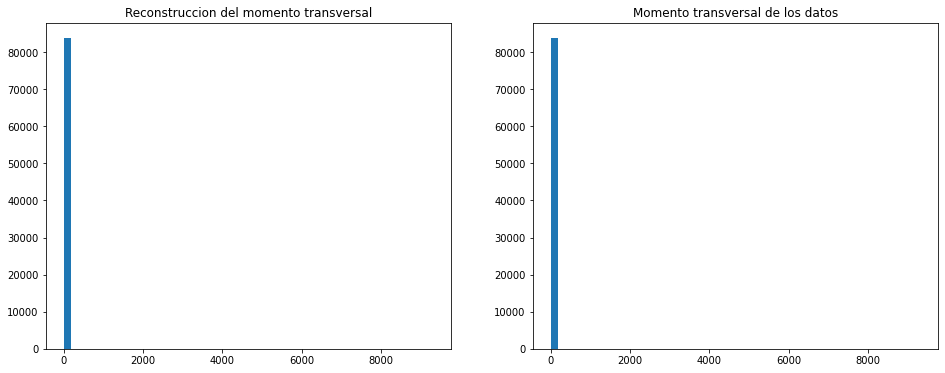

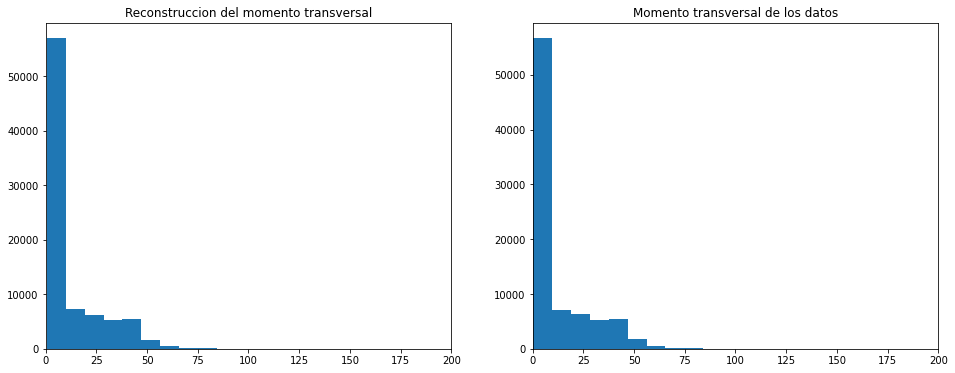

In [ ]:
"""
Grafiquemos el momento transversal
"""
#Se crea los momentos transversales
P_t_1 = np.sqrt(Datos["px1"]**2 + Datos["py1"]**2) #Momento transversal de la particula 1
P_t_2 = np.sqrt(Datos["px2"]**2 + Datos["py2"]**2) #Momento transversal de la particula 2

#Figura con dos graficas (Los momentos transversales)
#Se puede replicar para obtener los momentos transversales de las dos particulas o agregar más subplots para juntarlas
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.hist(P_t_2,50) # Histograma del momento transversal reconstruido
plt.title("Reconstruccion del momento transversal")
plt.subplot(1,2,2) 
plt.title("Momento transversal de los datos")
plt.hist(Datos["pt2"],50) #Momento transversal proporcionado en el Sample1

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.hist(P_t_2,1000) # Histograma del momento transversal reconstruido
plt.title("Reconstruccion del momento transversal")
plt.xlim(0,200)
plt.subplot(1,2,2) 
plt.title("Momento transversal de los datos")
plt.hist(Datos["pt2"],1000) #Momento transversal proporcionado en el Sample1
plt.xlim(0,200)




In [ ]:
"""
Por qué el histograma arroja datos de valores tan altos?
En esta parte del programa intentaremos averiguar, con unas cuantas lineas de codigo
porque da ese valor, cuál es ese valor, y por supuesto encontrar el resto de datos asociados,
es decir, el numero de corrida, el evento, etc.
"""

maxi = max(P_t_2[1:]) #Encontramos el máximo valor de los momentos transversales reconstruido
maxi2 = max(Datos["pt2"][1:]) #Encontramos el máximo valor de los momentos transversales de los datos

pos = np.where(P_t_2==maxi) #Ubicamos la posicion del máximo
pos2 = np.where(Datos["pt2"]==maxi2) #Ubicamos la posición del máximo en los datos
print(Datos[pos2])

[(165364., 9.52724295e+08, nan, -1., 5.7938, 2.0248, 1.6249, 22.3249, -0.3132, 5.7853, 21.5598, nan, 1., 9319.79, 2.3175, 1.7036, 47758.8, -1233.83, 9237.75, 46840.6, 70.671)]


-0.07359725000424078
-0.168294250004692
-0.045875009993324056
-0.033895200002007186
-11.543812569230795
-21.46264325454831


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


Text(0, 0.5, 'Eventos')

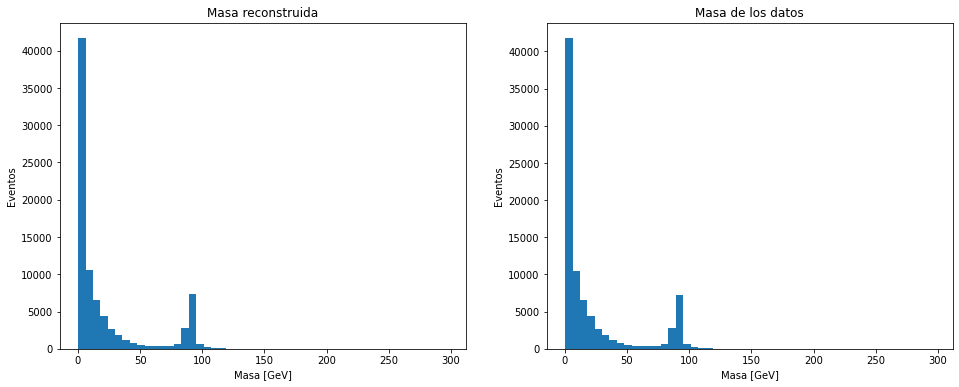

In [ ]:

E_2 = (E1+E2)**2 #Creo los datos para la energia al cuadrado
P_2 = ((px1+px2)**2+(py1+py2)**2+(pz1+pz2)**2) #El momento al cuadrado
M2 = E_2-P_2 #Vector con la masa invariante al cuadrado, es posible desde aqui sacar la raiz cuadrada

for i in range(len(M2)):
  if M2[i] < 0:
    print(M2[i])

#Creamos una figura que contendra dos graficas (las masas)
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.hist(np.sqrt(M2),50) #Histograma de la masa reconstruida
plt.title("Masa reconstruida")
plt.xlabel("Masa [GeV]")
plt.ylabel("Eventos")
plt.subplot(1,2,2)
plt.hist(Datos["M"],50)
plt.title("Masa de los datos") #Histograma de la masa dada en el sample1
plt.xlabel("Masa [GeV]")
plt.ylabel("Eventos")


(array([ 133.,  263.,  385.,  637.,  771.,  577.,  377.,  344.,  451.,
         609., 1019., 2195., 4719., 2472., 1389., 1011.,  888.,  808.,
        1093., 2211., 3606., 3877., 3449., 3599., 7155., 6755., 3491.,
        3343., 3732., 3334., 2110.,  982.,  795.,  808.,  902., 1157.,
        2005., 3547., 1776.,  841.,  531.,  404.,  342.,  308.,  568.,
         695.,  624.,  351.,  203.,  119.]),
 array([-6.266200e+00, -6.015446e+00, -5.764692e+00, -5.513938e+00,
        -5.263184e+00, -5.012430e+00, -4.761676e+00, -4.510922e+00,
        -4.260168e+00, -4.009414e+00, -3.758660e+00, -3.507906e+00,
        -3.257152e+00, -3.006398e+00, -2.755644e+00, -2.504890e+00,
        -2.254136e+00, -2.003382e+00, -1.752628e+00, -1.501874e+00,
        -1.251120e+00, -1.000366e+00, -7.496120e-01, -4.988580e-01,
        -2.481040e-01,  2.650000e-03,  2.534040e-01,  5.041580e-01,
         7.549120e-01,  1.005666e+00,  1.256420e+00,  1.507174e+00,
         1.757928e+00,  2.008682e+00,  2.259436e+00,  2.

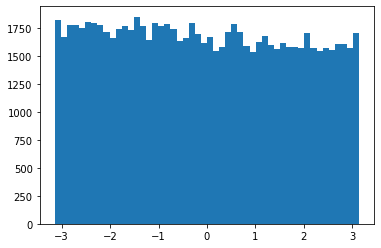

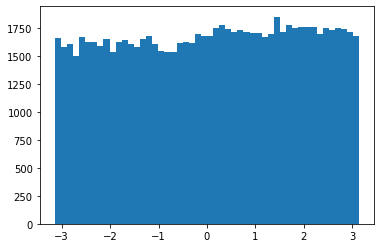

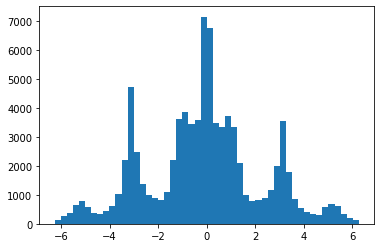

In [ ]:
"""
Graficamos las distribuciones de phi asi como delta Phi
"""
phi1 = []
phi2 = []
Dphi = []


plt.figure()
plt.hist(Datos["phi1"],50)
plt.figure()
plt.hist(Datos["phi2"],50)
plt.figure()
plt.hist(Datos["phi1"]-Datos["phi2"],50)

(array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 7.0000e+00,
         1.5000e+01, 1.5000e+01, 3.4000e+01, 2.4000e+01, 3.0000e+01,
         2.1000e+01, 3.6000e+01, 1.4400e+02, 2.7600e+02, 5.9200e+02,
         1.0730e+03, 1.5890e+03, 2.2310e+03, 2.9540e+03, 3.4050e+03,
         3.9640e+03, 1.2595e+04, 1.5118e+04, 1.9447e+04, 6.5120e+03,
         3.5360e+03, 3.1920e+03, 2.4550e+03, 1.7530e+03, 1.2270e+03,
         7.4500e+02, 3.4400e+02, 1.6900e+02, 8.2000e+01, 2.9000e+01,
         3.6000e+01, 2.8000e+01, 2.9000e+01, 1.7000e+01, 2.1000e+01,
         1.3000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
         6.0000e+00, 2.3000e+01, 4.2000e+01, 8.9000e+01, 1.6800e+02,
         1.9500e+02, 3.2800e+02, 5.3500e+02, 7.1200e+02, 1.0180e+03,
         1.4380e+03, 1.5870e+03, 1.9410e+03, 2.1320e+03, 2.2270e+03,
         2.9950e+03, 8.3990e+03, 

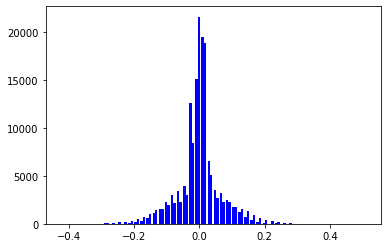

In [ ]:
"""
Grafiquemos eta
"""
eta = []
theta = []
theta1 = np.arccos(Datos["pz1"]/(P_t_1**2+Datos["pz1"]**2))
eta1 = -np.log(np.tan(theta1/2))
theta.append(theta1)#se agrega  theta1 a theta 
theta2 = np.arccos(Datos["pz2"]/(P_t_1**2+Datos["pz2"]**2))
eta2 = -np.log(np.tan(theta2/2))
theta.append(theta2) #se agrega  theta2 a theta
eta.append(eta1)#se agrega  eta1 a eta
eta.append(eta2)#se agrega  eta2 a eta

plt.hist(eta,50,color=("b","b"))

